In [52]:
# Clasificador de imagenes a partir de clases usando redes convolucionales en tensorflow
# David Rodriguez


#importar librerias
import math
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np



In [53]:
#obtenemos el dataset de los datasets que nos ofrece tensorflow
data, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

In [54]:
#separar en training y test 
training_data, tests_data = data['train'], data['test']


In [55]:
class_names = metadata.features['label'].names
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [56]:
#Normalizar las imagenes de 0-255 a 0-1
def normalize(images, tags):
    images = tf.cast(images, tf.float32)
    images /= 255 #normalización
    return images, tags
    
training_data = training_data.map(normalize)
tests_data = tests_data.map(normalize)

"""# Usaremos memoria en cache para ace
# Add to cache (to use memory instead of disk and achieve a faster training)
training_data = training_data.cache()
tests_data = tests_data.cache()"""

'# Usaremos memoria en cache para ace\n# Add to cache (to use memory instead of disk and achieve a faster training)\ntraining_data = training_data.cache()\ntests_data = tests_data.cache()'

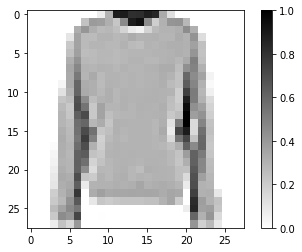

In [57]:
# Mostraremos ina imagen para comprobar 
for image, tag in training_data.take(1):
    break
image = image.numpy().reshape((28,28))  

# Mostraremos una imagen para probar que todo vaya bien
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


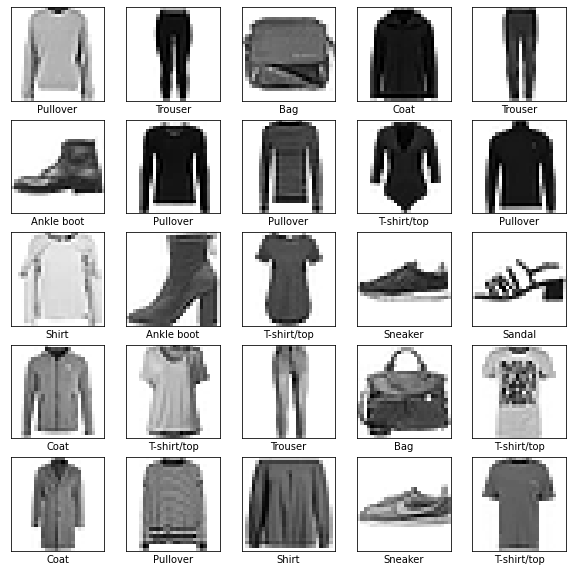

In [58]:
# Generaremos una matriz de imagenes con su respectiva clase para verificar los datos
plt.figure(figsize=(10,10))
for i, (image, tag) in enumerate(training_data.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[tag])
plt.show()

In [59]:
''' 
Hay 789 neuronas en la capa de entrada (28x28)px
Hay 50 neuronas en cada una de las dos capas intermedias
Hay 10 neuronas en la capa de salida (una por cada clase)

'''

# Creamos el modelo con las especificaciones del docstring de arriba
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), 
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) #funcion de activacion softmax para que la suma de los resultados de 1

])

In [60]:
# compilamos el modelo
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # usaremos la funcion de perdida SCC
    metrics=['accuracy']
)

In [61]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 50)                39250     
                                                                 
 dense_18 (Dense)            (None, 50)                2550      
                                                                 
 dense_19 (Dense)            (None, 50)                2550      
                                                                 
 dense_20 (Dense)            (None, 50)                2550      
                                                                 
 dense_21 (Dense)            (None, 50)                2550      
                                                                 
 dense_22 (Dense)            (None, 50)               

In [62]:
ntraining = metadata.splits['train'].num_examples
ntests = metadata.splits['test'].num_examples

In [63]:
print(f'Ntraining: {ntraining}')
print(f'Ntests: {ntests}')

Ntraining: 60000
Ntests: 10000


In [64]:
# definiremos un chunk size para optimizar el entrenamiento
chunk_size = 32

# Usaremos la funcion shuffle para asegurarnos que nuestro entrenamiento sea aleatorio
training_data = training_data.repeat().shuffle(ntraining).batch(chunk_size)
tests_data = tests_data.batch(chunk_size)

In [65]:
#training
record = model.fit(training_data, epochs=10, steps_per_epoch=math.ceil(ntraining/chunk_size))


Epoch 1/10
1875/1875 [==============================] - 14s 4ms/step - loss: 0.5367 - accuracy: 0.8057
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4029 - accuracy: 0.8520
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3579 - accuracy: 0.8683
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3443 - accuracy: 0.8736
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3221 - accuracy: 0.8805
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3078 - accuracy: 0.8871
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2983 - accuracy: 0.8895
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2888 - accuracy: 0.8930
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2785 - accuracy: 0.8970
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2

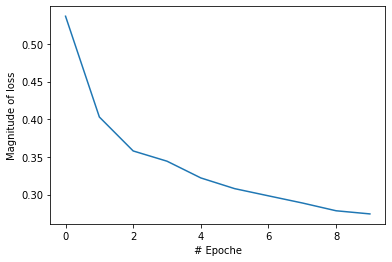

In [66]:
# graficaremos nuestra funcion de perdida
plt.xlabel("# Epoche")
plt.ylabel("Magnitude of loss")
plt.plot(record.history["loss"])

1/1 [==============================] - 0s 110ms/step


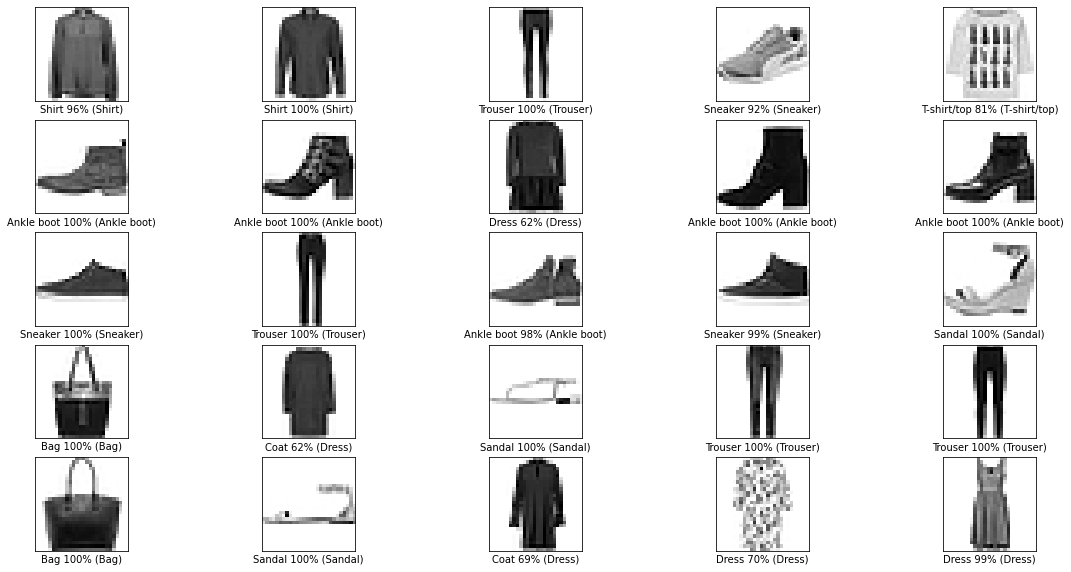

In [67]:
# verificaremos nuestras predicciones con los valores reales

for test_images, test_labels in training_data.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

def graph_image(i, predictions_array, real_labels, images):
  predictions_array, real_label, img = predictions_array[i], real_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predict_label = np.argmax(predictions_array)
  
  plt.xlabel("{} {:2.0f}% ({})".format(
      class_names[predict_label],
      100*np.max(predictions_array),
      class_names[real_label]
  ))


rows = 5
columns = 5
img_n = rows*columns
plt.figure(figsize=(2*2*columns, 2*rows))

for i in range(img_n):
  plt.subplot(rows,2*columns, 2*i+1)
  graph_image(i, predictions, test_labels, test_images)
